In [1]:
#imports and dependancies
import pandas as pd
import numpy as np

# Import the hvPlot library
import hvplot.pandas
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

In [2]:
#source "https://covidtracking.com/data/download"

covid_data = pd.read_csv(
    Path('usa_covid_cases.csv'))

In [3]:
covid_df = covid_data[['date', 'positive', 'state']]

In [4]:
covid_df.set_index('date', inplace=True)

In [5]:
import pandas as pd

# Assuming 'covid_df' has 'date' as the index

# Ensure the 'date' index is in datetime format
covid_df.index = pd.to_datetime(covid_df.index)

# Resample the data to monthly intervals and aggregate as needed
monthly_summary = covid_df.resample('M').sum()

# 'monthly_summary' now contains aggregated data for each month


C:\Users\mfasi\AppData\Local\Temp\ipykernel_4760\720830351.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_summary = covid_df.resample('M').sum()


In [6]:
import pandas as pd
import hvplot.pandas
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact

# Source: https://covidtracking.com/data/download 

# Assuming 'covid_df' has 'date' as the index, 'state' and 'positive' columns

# Create a list of unique state values from your DataFrame
states = covid_df['state'].unique()

# Create a dropdown widget
state_dropdown = widgets.Dropdown(options=states, description='Select a State:')

# Create a function to update the plot based on the selected state
def update_plot(selected_state):
    selected_data = covid_df[covid_df['state'] == selected_state]
    monthly_summary = selected_data.resample('M').sum()
    
    line_plot = monthly_summary.hvplot.line(x='date', y='positive', title=f'Positive Cases in {selected_state} (Monthly Summary)')
    display(line_plot)

# Use the interact function to create an interactive widget
interact(update_plot, selected_state=state_dropdown)

# Display the dropdown and the initial plot
display(state_dropdown)
update_plot(states[0])  # Display the initial plot for the first state in the list


interactive(children=(Dropdown(description='Select a State:', options=('AK', 'AL', 'AR', 'AS', 'AZ', 'CA', 'CO…

Dropdown(description='Select a State:', options=('AK', 'AL', 'AR', 'AS', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', '…

C:\Users\mfasi\AppData\Local\Temp\ipykernel_4760\2796949858.py:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_summary = selected_data.resample('M').sum()


:Curve   [date]   (positive)

In [7]:
import pandas as pd

# Source: https://www.bls.gov/news.release/brs1.htm 
wfh_data = {
    'Year': [2020, 2022],  # Years as integers
    'Percentage': [26.1, 35.2]  # Percentages as floats
}
work_from_home_df = pd.DataFrame(wfh_data)
work_from_home_df.set_index('Year', inplace=True)

In [8]:
bar_chart = work_from_home_df.hvplot.bar(title="Employers with employees \nWorking from home some of the time or all of the time")

bar_chart


:Bars   [Year]   (Percentage)

In [9]:
print(' A 34.87% increase in a two year period.')

 A 34.87% increase in a two year period.


In [15]:
import numpy as np

# Set the parameters for the Monte Carlo simulation
num_simulations = 1000  # Number of simulations
future_years = range(2023, 2028)  # Define the range of future years

# Get the mean and standard deviation of the available data
mean_percentage = work_from_home_df['Percentage'].mean()
std_dev_percentage = work_from_home_df['Percentage'].std()

# Create a DataFrame to store the simulated results
simulated_wfh = pd.DataFrame()

# Perform the Monte Carlo simulation
for i in range(num_simulations):
    # Simulate future work-from-home percentages based on a normal distribution
    simulated_percentages = np.random.normal(mean_percentage, std_dev_percentage, len(future_years))
    
    # Round the simulated percentages to two decimal places
    simulated_percentages = np.round(simulated_percentages, 2)
    
    # Store the simulated data in the DataFrame
    simulated_wfh[f"Simulation {i+1}"] = simulated_percentages

simulated_wfh.index = future_years  # Set the index to represent future years
simulated_wfh.head()  # Display the simulated work-from-home percentages


C:\Users\mfasi\AppData\Local\Temp\ipykernel_4760\384720059.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  simulated_wfh[f"Simulation {i+1}"] = simulated_percentages
C:\Users\mfasi\AppData\Local\Temp\ipykernel_4760\384720059.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  simulated_wfh[f"Simulation {i+1}"] = simulated_percentages
C:\Users\mfasi\AppData\Local\Temp\ipykernel_4760\384720059.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which ha

,Simulation 1,Simulation 2,Simulation 3,Simulation 4,Simulation 5,Simulation 6,Simulation 7,Simulation 8,Simulation 9,Simulation 10,...,Simulation 991,Simulation 992,Simulation 993,Simulation 994,Simulation 995,Simulation 996,Simulation 997,Simulation 998,Simulation 999,Simulation 1000
2023,29.25,36.18,17.69,32.09,33.03,28.64,37.30,36.02,37.75,26.41,...,39.83,25.07,37.95,33.71,35.28,27.53,34.69,15.93,37.42,19.41
2024,30.18,31.86,30.56,24.98,29.71,34.97,28.92,27.57,20.91,30.34,...,37.33,21.48,38.84,25.61,51.99,33.44,21.65,28.44,28.98,25.56
2025,27.73,40.54,31.99,25.06,27.45,30.82,34.35,21.22,25.13,27.63,...,44.24,33.49,23.20,23.97,30.50,30.03,26.39,31.66,36.43,25.10
2026,31.57,37.58,33.13,25.21,34.74,34.22,38.49,27.81,34.12,29.35,...,21.06,33.34,32.63,31.62,35.48,41.52,33.47,15.26,37.47,31.78
2027,23.98,29.53,30.33,28.06,22.44,32.36,21.33,28.80,14.36,40.12,...,24.73,22.91,34.22,22.52,20.90,14.01,30.65,25.69,28.21,22.36


In [10]:
# Source https://fred.stlouisfed.org/series/ECOMPCTSA

e_commerce_sales_5Y = pd.read_csv(
    Path('fed_e_commerce__sales_report.csv'))

In [11]:
e_commerce_sales_5Y = e_commerce_sales_5Y.rename(columns={'ECOMPCTSA': 'Percent'})

In [12]:
# Assuming 'e_commerce_sales_5Y' is your DataFrame and 'date' is the column you want to set as the index
e_commerce_sales_5Y = e_commerce_sales_5Y.set_index('DATE')


In [13]:
e_commerce_sales_5Y.hvplot.line(
    title="E-Commerce Retail Sales as a Percent of Total Sales",
     x='DATE',  # Use single quotes around column names
     y='Percent',
    xlabel='Date',  
    ylabel='Percent',
    rot= 45,
    color = 'purple'
)


:Curve   [DATE]   (Percent)

In [20]:
# Calculating mean and standard deviation of e-commerce sales data
mean_sales = e_commerce_sales_5Y.mean()
std_dev_sales = e_commerce_sales_5Y.std()

print(f"Mean: {mean_sales}")
print(f"Standard Deviation: {std_dev_sales}")


Mean: Percent    12.938095
dtype: float64
Standard Deviation: Percent    2.423938
dtype: float64


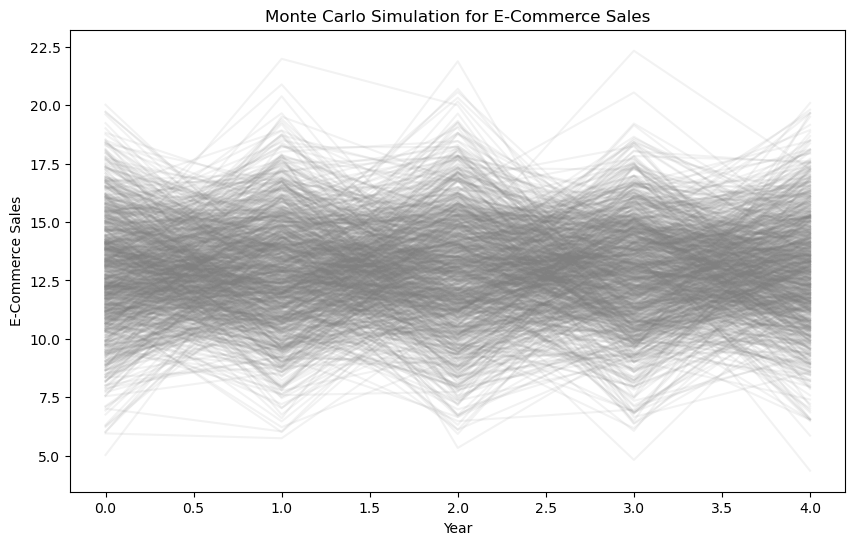

In [25]:
# Assuming you have mean and standard deviation values for e-commerce sales data
import numpy as np

# Generate random data for Monte Carlo simulation based on mean and standard deviation
mean_sales = 12.938095 
std_dev_sales = 2.423938  

# Set the number of years for simulation
num_years = 5
num_simulations = 1000  # Number of simulations

# Perform Monte Carlo simulation
simulated_sales = []
for i in range(num_simulations):
    sales = np.random.normal(mean_sales, std_dev_sales, num_years)
    simulated_sales.append(sales)

# Convert to a DataFrame for visualization
simulated_sales_df = pd.DataFrame(simulated_sales).T

# Assuming you have historical sales data as a DataFrame, e.g., e_commerce_sales_5Y
# Combine historical data with the simulated data
# combined_data = pd.concat([e_commerce_sales_5Y, simulated_sales_df], axis=1)

# Plot the Monte Carlo simulation results
simulated_sales_df.plot(legend=False, color='grey', alpha=0.1, figsize=(10, 6))
plt.title('Monte Carlo Simulation for E-Commerce Sales')
plt.xlabel('Year')
plt.ylabel('E-Commerce Sales')
plt.show()
